In [1]:
import pandas as pd
import numpy as np
from invertiblewavelets import Transform
import matplotlib.pyplot as plt
from invertiblewavelets import *
from scipy import signal

#### Load Example Data from Swarm A Spacecraft Magnetoemter

In [32]:
data = np.load("data.npy")

# Adding some noise
sample_rate = 50.0                          # 50 Hz sampling rate
num_samples = data.shape[-1]                # 5000 samples
t = np.arange(num_samples) / sample_rate    # time array
#data += 100*np.sin(2.0 * np.pi *10 * t)       # 0.1 Hz sine wave

#### Create Transform Object and Analysis Filters

In [50]:
# Initializing the Transform object automatically forms the analysis and synthesis filter bank during __init__
transform = Transform(
    data=data,
    fs = sample_rate,
    wavelet=Cauchy(2000),
    pad_method='symmetric', # Padding method for the convolution calls np.pad. Set to None if no padding
    q = 4*4.907306434023998,
    Mc = 1
)

Text(0.5, 0, 'Frequency Channel')

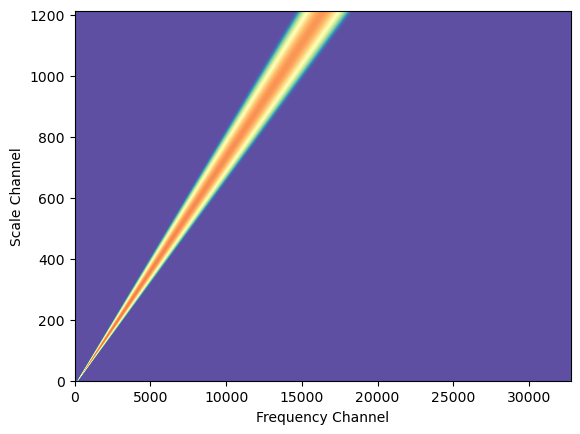

In [42]:
fig, ax = plt.subplots(1,1)
ax.imshow(np.log(np.abs(transform.Wfreq)+1e-3), aspect='auto', origin='lower', cmap='Spectral_r')
ax.set_ylabel('Scale Channel')
ax.set_xlabel('Frequency Channel')

In [51]:
transform.enforce_orthagonality(1e-2)

Text(0.5, 0, 'Frequency Channel')

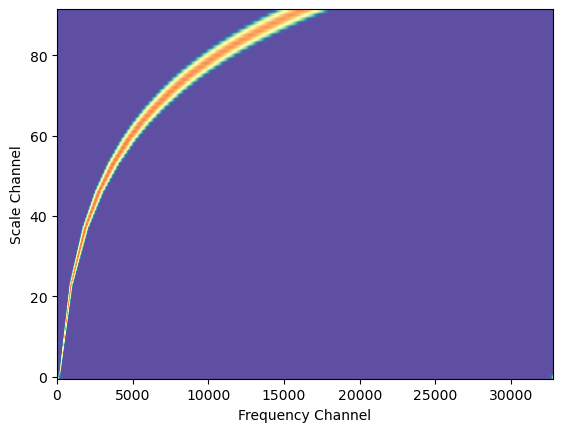

In [52]:
fig, ax = plt.subplots(1,1)
ax.imshow(np.log(np.abs(transform.Wfreq)+1e-3), aspect='auto', origin='lower', cmap='Spectral_r')
ax.set_ylabel('Scale Channel')
ax.set_xlabel('Frequency Channel')

#### Transform and Inverse the Data

Reconstruction error: 0.14965315503396392


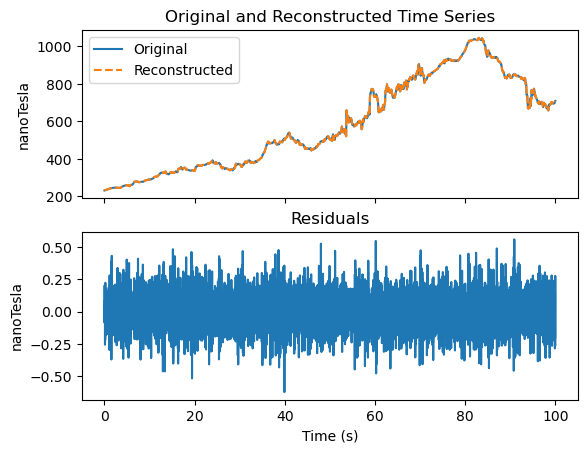

In [53]:
# Perform forward wavelet transform
coefficients = transform.forward(data)

# Perform inverse wavelet transform (reconstruction)
reconstructed = transform.inverse(coefficients)

# Calculate and print reconstruction error
reconstruction_error = np.sqrt(np.mean((reconstructed - data)**2))
print(f"Reconstruction error: {reconstruction_error}")

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, data, label='Original')
ax[0].plot(t, reconstructed, label='Reconstructed', linestyle='--')    
ax[0].set_ylabel('nanoTesla')
ax[0].legend()
ax[0].set_title('Original and Reconstructed Time Series')
ax[1].plot(t, data - reconstructed)
ax[1].set_title('Residuals')
ax[1].set_ylabel('nanoTesla')
ax[1].set_xlabel('Time (s)')
plt.show()

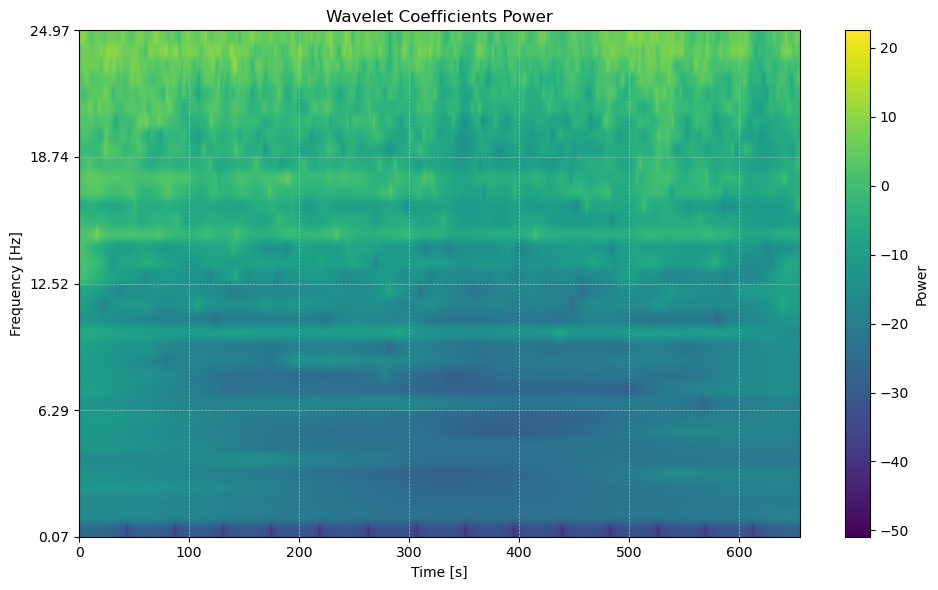

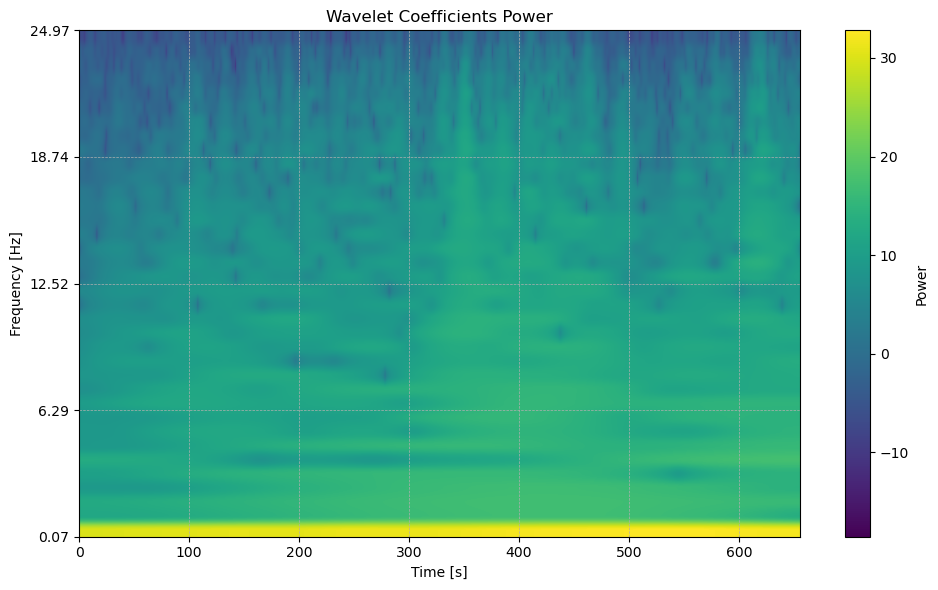

In [38]:
coeff_res = transform.forward(data-reconstructed)
transform.power_scalogram(coeff_res / (coefficients.conj()))
transform.power_scalogram(coefficients)

#### Check the wavelet spectral coverage

#### Check Wavelet Orthgonality

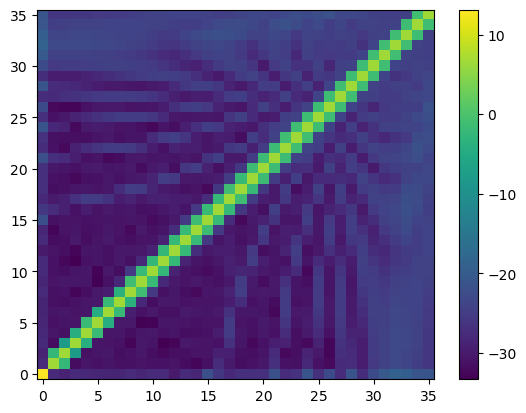

In [39]:
w_time = np.fft.ifft(transform.Wfreq, axis=-1)
delta_kl = w_time.conj() @ w_time.T
plt.imshow(np.log(np.abs(delta_kl)), aspect='auto', origin='lower')
cbar = plt.colorbar()

#### Check Spectral Leakage

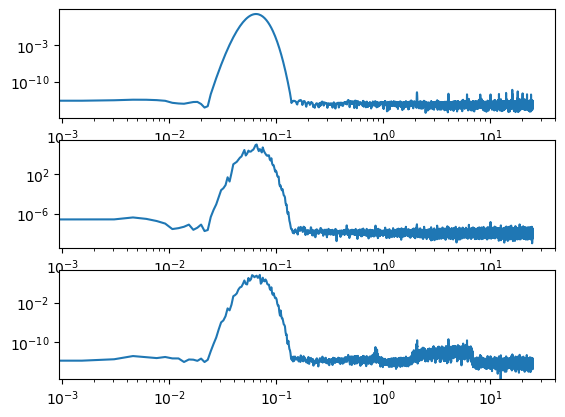

In [9]:
fig, ax = plt.subplots(3,1)
i = 1
N = coefficients.shape[-1]
freqs = np.fft.fftfreq(N, d=1/sample_rate)
ax[0].plot(freqs[:N//2], np.abs(transform.Wfreq[i][:N//2]))
ax[1].plot(freqs[:N//2], np.abs(np.fft.fft(coefficients, axis=1))[i][:N//2])
ax[2].plot(freqs[:N//2], np.abs(np.fft.fft(coeff_res, axis=1))[i][:N//2])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

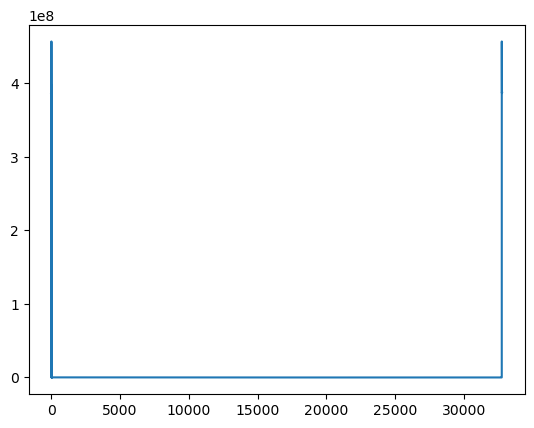

In [10]:
plt.plot(transform.Sfreq)

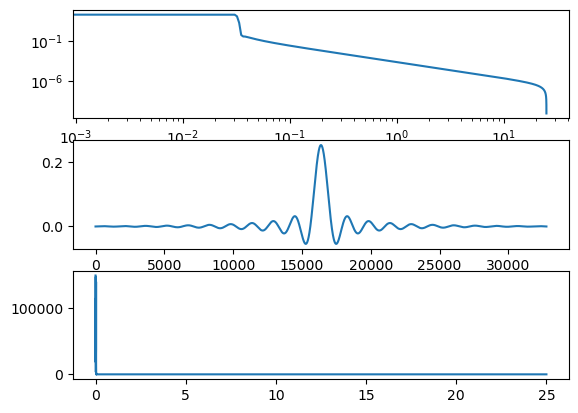

In [11]:
wtime = (1.0 / np.sqrt(transform.b)) * np.sinc(transform.time / transform.b)* np.exp(-(transform.time/transform.b**2)**2)
wf = np.fft.fft(wtime)

fig, ax = plt.subplots(3,1)
i = 0
N = coefficients.shape[-1]
freqs = np.fft.fftfreq(N, d=1/sample_rate)
ax[0].plot(freqs[:N//2], np.abs(wf[:N//2]))
ax[1].plot(wtime)
ax[2].plot(freqs[:N//2], np.abs(np.fft.fft(coeff_res, axis=1))[i][:N//2])
ax[0].set_yscale('log')
ax[0].set_xscale('log')



(0.00019427153144387606-8.183574407062261e-12j)


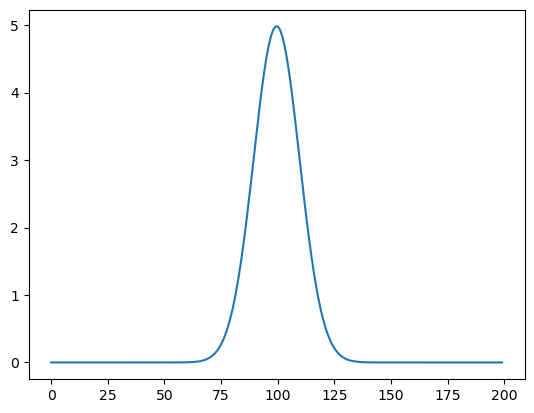

In [30]:
plt.plot(np.abs(np.fft.ifft(transform.Wfreq[485]/transform.phase_shift))[transform.N//2-100:transform.N//2+100])

i = 380; j = 485
print(np.dot(np.fft.ifft(transform.Wfreq[i]/transform.phase_shift),np.fft.ifft(transform.Wfreq[j]/transform.phase_shift).conj()))